In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

In [68]:
Nx = 64
Ny = 1
Nz = 64
et = 1.0

def load(Nx,Ny,et):
    base_fn = 'output_swe_vortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

after_full_step
1.0
comp: comp_1.0_pp_tra_truth
comp: comp_1.0_pp_tra_truth
comp: comp_1.0_pp_tra_truth
comp: comp_1.0_pp_tra_truth
comp: comp_1.0_pp_tra_truth
2.214798 2.2073298
comp: comp_1.0_pp_tra_truth


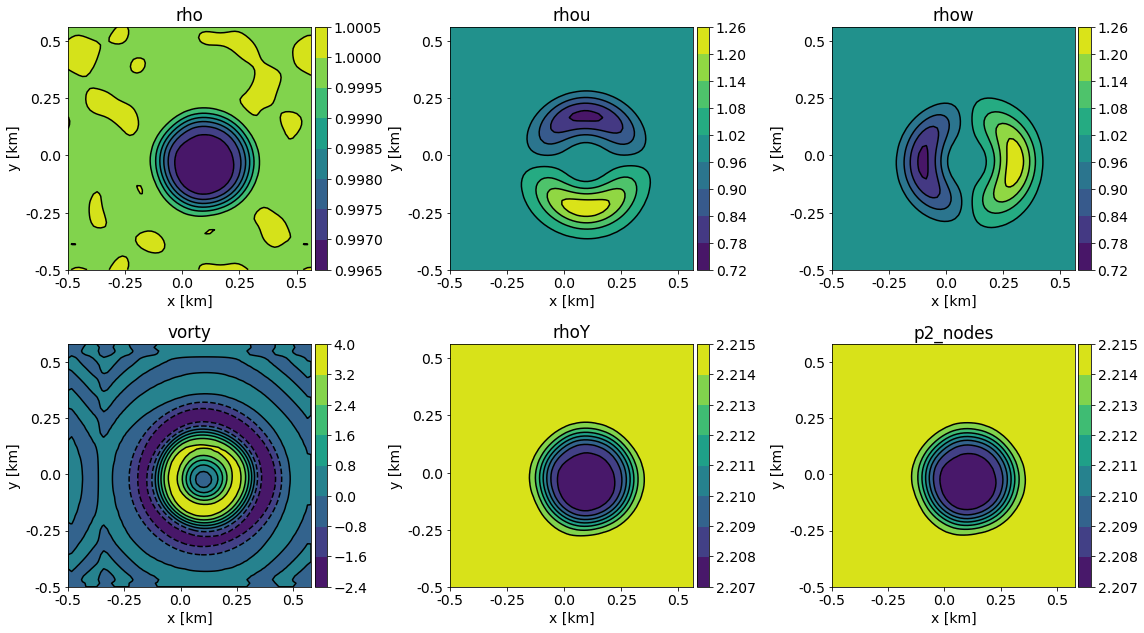

In [118]:
comp_sfx = 'comp_1.2'
comp_sfx = 'comp_1.0'
# comp_sfx = 'comp_test'
# comp_sfx = 'psinc'
# comp_sfx = 'debug_00_u'
comp_sfx = 'debug_vortparam'
# comp_sfx = 'debug_plus'
comp_sfx = 'wdawloc_pp_1E3_rhou_rhow_tra'
comp_sfx = 'debug_psinc_1E3'
comp_sfx = 'comp_1.0_pp_tra_truth'
# comp_sfx = 'noda_pp_psinc'
# comp_sfx = tc.cb_suffix(2,0, '%s' %(comp_sfx))

N = 1
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
# attributes = ['p2_nodes']
# attributes = ['after_swe_to_lake', 'after_lake_to_swe']
t_lbl = 'TIME'
# t_lbl = 'WINDOW_STEP'
slc = 2

times = [1.0]
# times = [5]
tag = tags[9]
# tag = 'after_swe_to_lake'
# tag = 'after_lake_to_swe'
print(tag)

# times = [0.0]
# tag = 'ic'

arr_lst = []

class oo(object):
    def __init__(self):
        None

if 'comp' in comp_sfx:
    oo_comp = oo()
else:
    oo_pi = oo()
            
for tt,time in enumerate(times):
    print(time)
    for atr_idx, attribute in enumerate(attributes):
        
        arr = tc.get_arr(path,time, N, attribute, label_type=t_lbl, tag=tag, inner=False, avg=False)[0][:,slc,:]
        arr = arr.T
        
#         if attribute == 'rho':
#             print(rho.min())
    
            
        if attribute == 'p2_nodes':
#             arr -= arr.mean()
#             diff = arr.max() - arr.min()
#             print(diff)
#             arr -= arr.min()
#             arr -= arr.max()
            
#             if 'psinc' in comp_sfx:
#             arr *= diff
            print(arr.max(), arr.min())
            
#             arr_lst.append([arr,"scaled %s" %attribute])
            arr_lst.append([arr, '%s' %attribute])
        else:
            arr_lst.append([arr,attribute])
            
        if 'comp' in comp_sfx:
            print("comp:" ,comp_sfx)
            setattr(oo_comp,attribute,arr)
        else:
            print("pi", comp_sfx)
            setattr(oo_pi,attribute,arr)        
            
        arr = [arr,attribute]

pl = pt.plotter(arr_lst,ncols=3,figsize=(16,14),sharey=False)
# lvls = np.arange(-0.45,1.7,0.1)
lvls = np.arange(-11.0,11.1,2)
# lvls = np.arange(H-60,H+42,2)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')

0.0072484016


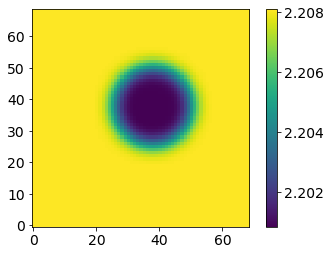

In [123]:
tmp = np.copy(oo_pi.p2_nodes)
# tmp = tmp - tmp.max()
# tmp += 0.1
# tmp += 0.9941137
# tmp += 2.2147975
tmp -= tmp.mean()
tmp += comp_min
print(tmp.max() - tmp.min())

# print(tmp-tmp.mean())

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(tmp,origin='lower')
plt.colorbar()
plt.show()

In [126]:
0.0074665546 - 0.0072484016

0.00021815299999999958

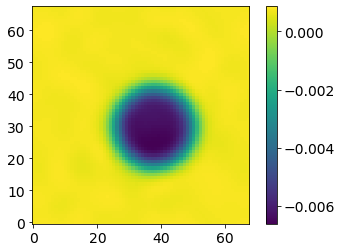

In [124]:
# tmp = oo_comp.p2_nodes
# tmp = tmp - tmp.max()
# tmp += 0.1

comp = oo_comp.rhoY

# print(tmp.max(), tmp.min(), tmp.max()-tmp.min())

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(comp,origin='lower')
plt.colorbar()
plt.show()

0.0074665546


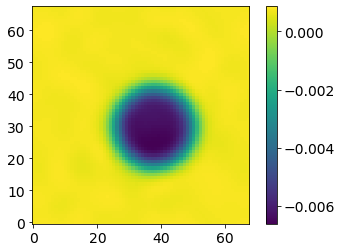

In [125]:
comp_min = comp.min()
comp -= comp.min()
comp -= comp.mean()
print(comp.max() - comp.min())

plt.figure()
plt.imshow(comp,origin='lower')
plt.colorbar()
plt.show()

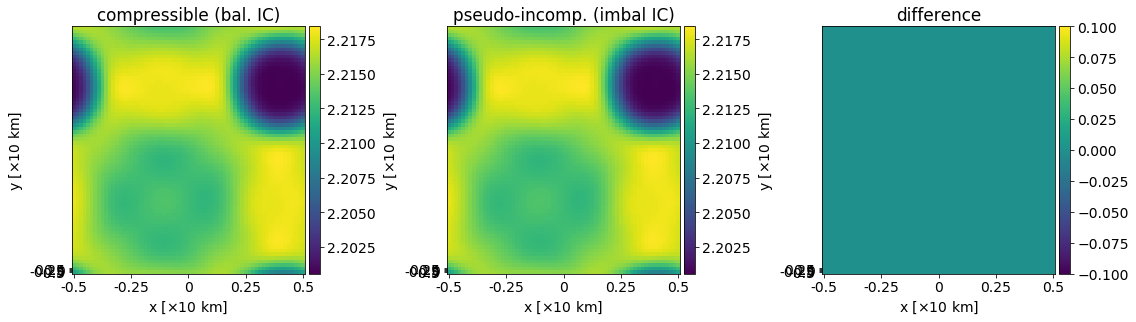

In [9]:
N = 1
sfxs = ['comp','comp']

paths = []
for sfx in sfxs:
    fn = tc.get_filename(N,sfx)
    path = tc.get_path(fn)
    paths.append(path)


attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
# attributes = ['rhoY', 'rho']
attributes = ['p2_nodes']

# times = [0.0,5.0,10.0]
# times = [0.0]
times = [0.35]
ltags = ['ic',tags[9],tags[9]]
ltags = [tags[9]]
ldicts = pt.labels()
llabels = ['compressible (bal. IC)', 'pseudo-incomp. (imbal IC)']

t_lbl = 'TIME'
arr_lst = []

class oo(object):
    def __init__(self):
        None
        
oo_comp = oo()
oo_psinc = oo()

for tt,time in enumerate(times):
    tag = ltags[tt]
    for atr_idx, attribute in enumerate(attributes):
        for pp, path in enumerate(paths):
            arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0]
            arr = arr[:,0,:].T
        
            if pp == 0:
                setattr(oo_comp,attribute,arr)
            if pp == 1:
                setattr(oo_psinc,attribute,arr)
        
            arr_lst.append([arr, llabels[pp]])
arr_lst.append([oo_comp.p2_nodes - oo_psinc.p2_nodes, 'difference'])

ncolslen = len(times) * len(attributes)
ncolslen = 3
fs = (16,6)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)
x_axs = [-0.5,-0.25,0,0.25,0.5]
y_axs = [-0.5,-0.25,0,0.25,0.5]
x_loc = np.linspace(0,Nx,5)
y_loc = np.linspace(0,Ny,5)
x_label = r'x [$\times 10$ km]'
y_label = r'y [$\times 10$ km]'
pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='imshow')
pl.save_fig('vortex_view')

In [ ]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']
attributes = ['p2_nodes']
base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
print(t_axs, t_pos)
probe_loc = [0,0]
l_typ = 'TIME'
l_typ = 'WINDOW_STEP'

pl = pt.plotter_1d(figsize=(12,8),fontsize=14,ncols=1,nrows=1)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    ens_1_suffix = 'noib'
    ens_2_suffix = 'ib_noconv_reset'
    ens_3_suffix = 'ib_noconv'
    ens_4_suffix = 'ib'
    psinc_suffix = 'bal_ic'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    psinc = get_ens(psinc_suffix, diff)

    ax = pl.get_ax(i)
    
    avg = False
    
    if diff == True: times = times[1:]
    probe_ens_1 = ens_1[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_2 = ens_2[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_3 = ens_3[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_4 = ens_4[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_psinc = psinc[:,probe_loc[0],probe_loc[1]] * p_ref
    
    
    ens_1_label = 'No blending, no $P$ conversion'
    ens_2_label = 'Blending, no $P$ conversion, with $\pi$ reset'
    ens_3_label = 'Blending, no $P$ conversion, no $\pi$ reset'
    ens_4_label = 'Blending with $P$ conversion, no $\pi$ reset'
    psinc_label = 'Balanced initial condition'
    
    ax.plot(times, probe_ens_1, label=ens_1_label)
    ax.plot(times, probe_ens_2, label=ens_2_label)
    ax.plot(times, probe_ens_3, label=ens_3_label)
    ax.plot(times, probe_ens_4, label=ens_4_label)
    ax.plot(times, probe_psinc, label=psinc_label)

    ax.set_title("")
    ax.set_xlim([times[0],times[-1]])
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.set_ylabel("%s" %attr_labels[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
#     ax.set_ylim([-0.0006,0.0006])
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    pl.save_fig('justification')
    
    prt.prtt('plt')